<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## Loading Data

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# A:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [4]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house['MSZoning'].unique()
#One non-residential type zone is present.

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [8]:
#dropping non-residential type zone.
residential = house.loc[house['MSZoning'] != 'C (all)']
residential

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
#MSSubClass is categorical, should convert to string.
residential['MSSubClass'] = residential['MSSubClass'].apply(lambda x : str(x))
residential

C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
#Keeping just the non-renovatable features.
#After reviewing the features, 'MSSubClass' contains information explained by other features ('YearBuilt, HouseStyle') and will be dropped here.
fixed = residential[["MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","YearBuilt","YearRemodAdd","BsmtQual","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageType","GarageYrBlt","GarageCars","GarageArea","PoolArea","MiscFeature","MiscVal","YrSold","SalePrice"]]
fixed

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscFeature,MiscVal,YrSold,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,Attchd,2003.0,2,548,0,NaN,0,2008,208500
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,1,Attchd,1976.0,2,460,0,NaN,0,2007,181500
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,1,Attchd,2001.0,2,608,0,NaN,0,2008,223500
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,1,Detchd,1998.0,3,642,0,NaN,0,2006,140000
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,1,Attchd,2000.0,3,836,0,NaN,0,2008,250000
5,RL,85.0,14115,Pave,NaN,IR1,Lvl,Inside,Gtl,Mitchel,...,0,Attchd,1993.0,2,480,0,Shed,700,2009,143000
6,RL,75.0,10084,Pave,NaN,Reg,Lvl,Inside,Gtl,Somerst,...,1,Attchd,2004.0,2,636,0,NaN,0,2007,307000
7,RL,NaN,10382,Pave,NaN,IR1,Lvl,Corner,Gtl,NWAmes,...,2,Attchd,1973.0,2,484,0,Shed,350,2009,200000
8,RM,51.0,6120,Pave,NaN,Reg,Lvl,Inside,Gtl,OldTown,...,2,Detchd,1931.0,2,468,0,NaN,0,2008,129900
9,RL,50.0,7420,Pave,NaN,Reg,Lvl,Corner,Gtl,BrkSide,...,2,Attchd,1939.0,1,205,0,NaN,0,2008,118000


In [11]:
fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 36 columns):
MSZoning        1450 non-null object
LotFrontage     1191 non-null float64
LotArea         1450 non-null int64
Street          1450 non-null object
Alley           89 non-null object
LotShape        1450 non-null object
LandContour     1450 non-null object
LotConfig       1450 non-null object
LandSlope       1450 non-null object
Neighborhood    1450 non-null object
Condition1      1450 non-null object
Condition2      1450 non-null object
BldgType        1450 non-null object
YearBuilt       1450 non-null int64
YearRemodAdd    1450 non-null int64
BsmtQual        1413 non-null object
1stFlrSF        1450 non-null int64
2ndFlrSF        1450 non-null int64
GrLivArea       1450 non-null int64
BsmtFullBath    1450 non-null int64
BsmtHalfBath    1450 non-null int64
FullBath        1450 non-null int64
HalfBath        1450 non-null int64
BedroomAbvGr    1450 non-null int64
KitchenAbvGr    1

In [12]:
#Grouping numerical features into one dataframe 
num_features = fixed.loc[:,fixed.dtypes != 'object']
num_features.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,2003,2003,856,854,1710,1,0,2,...,1,8,0,2003.0,2,548,0,0,2008,208500
1,80.0,9600,1976,1976,1262,0,1262,0,1,2,...,1,6,1,1976.0,2,460,0,0,2007,181500
2,68.0,11250,2001,2002,920,866,1786,1,0,2,...,1,6,1,2001.0,2,608,0,0,2008,223500
3,60.0,9550,1915,1970,961,756,1717,1,0,1,...,1,7,1,1998.0,3,642,0,0,2006,140000
4,84.0,14260,2000,2000,1145,1053,2198,1,0,2,...,1,9,1,2000.0,3,836,0,0,2008,250000


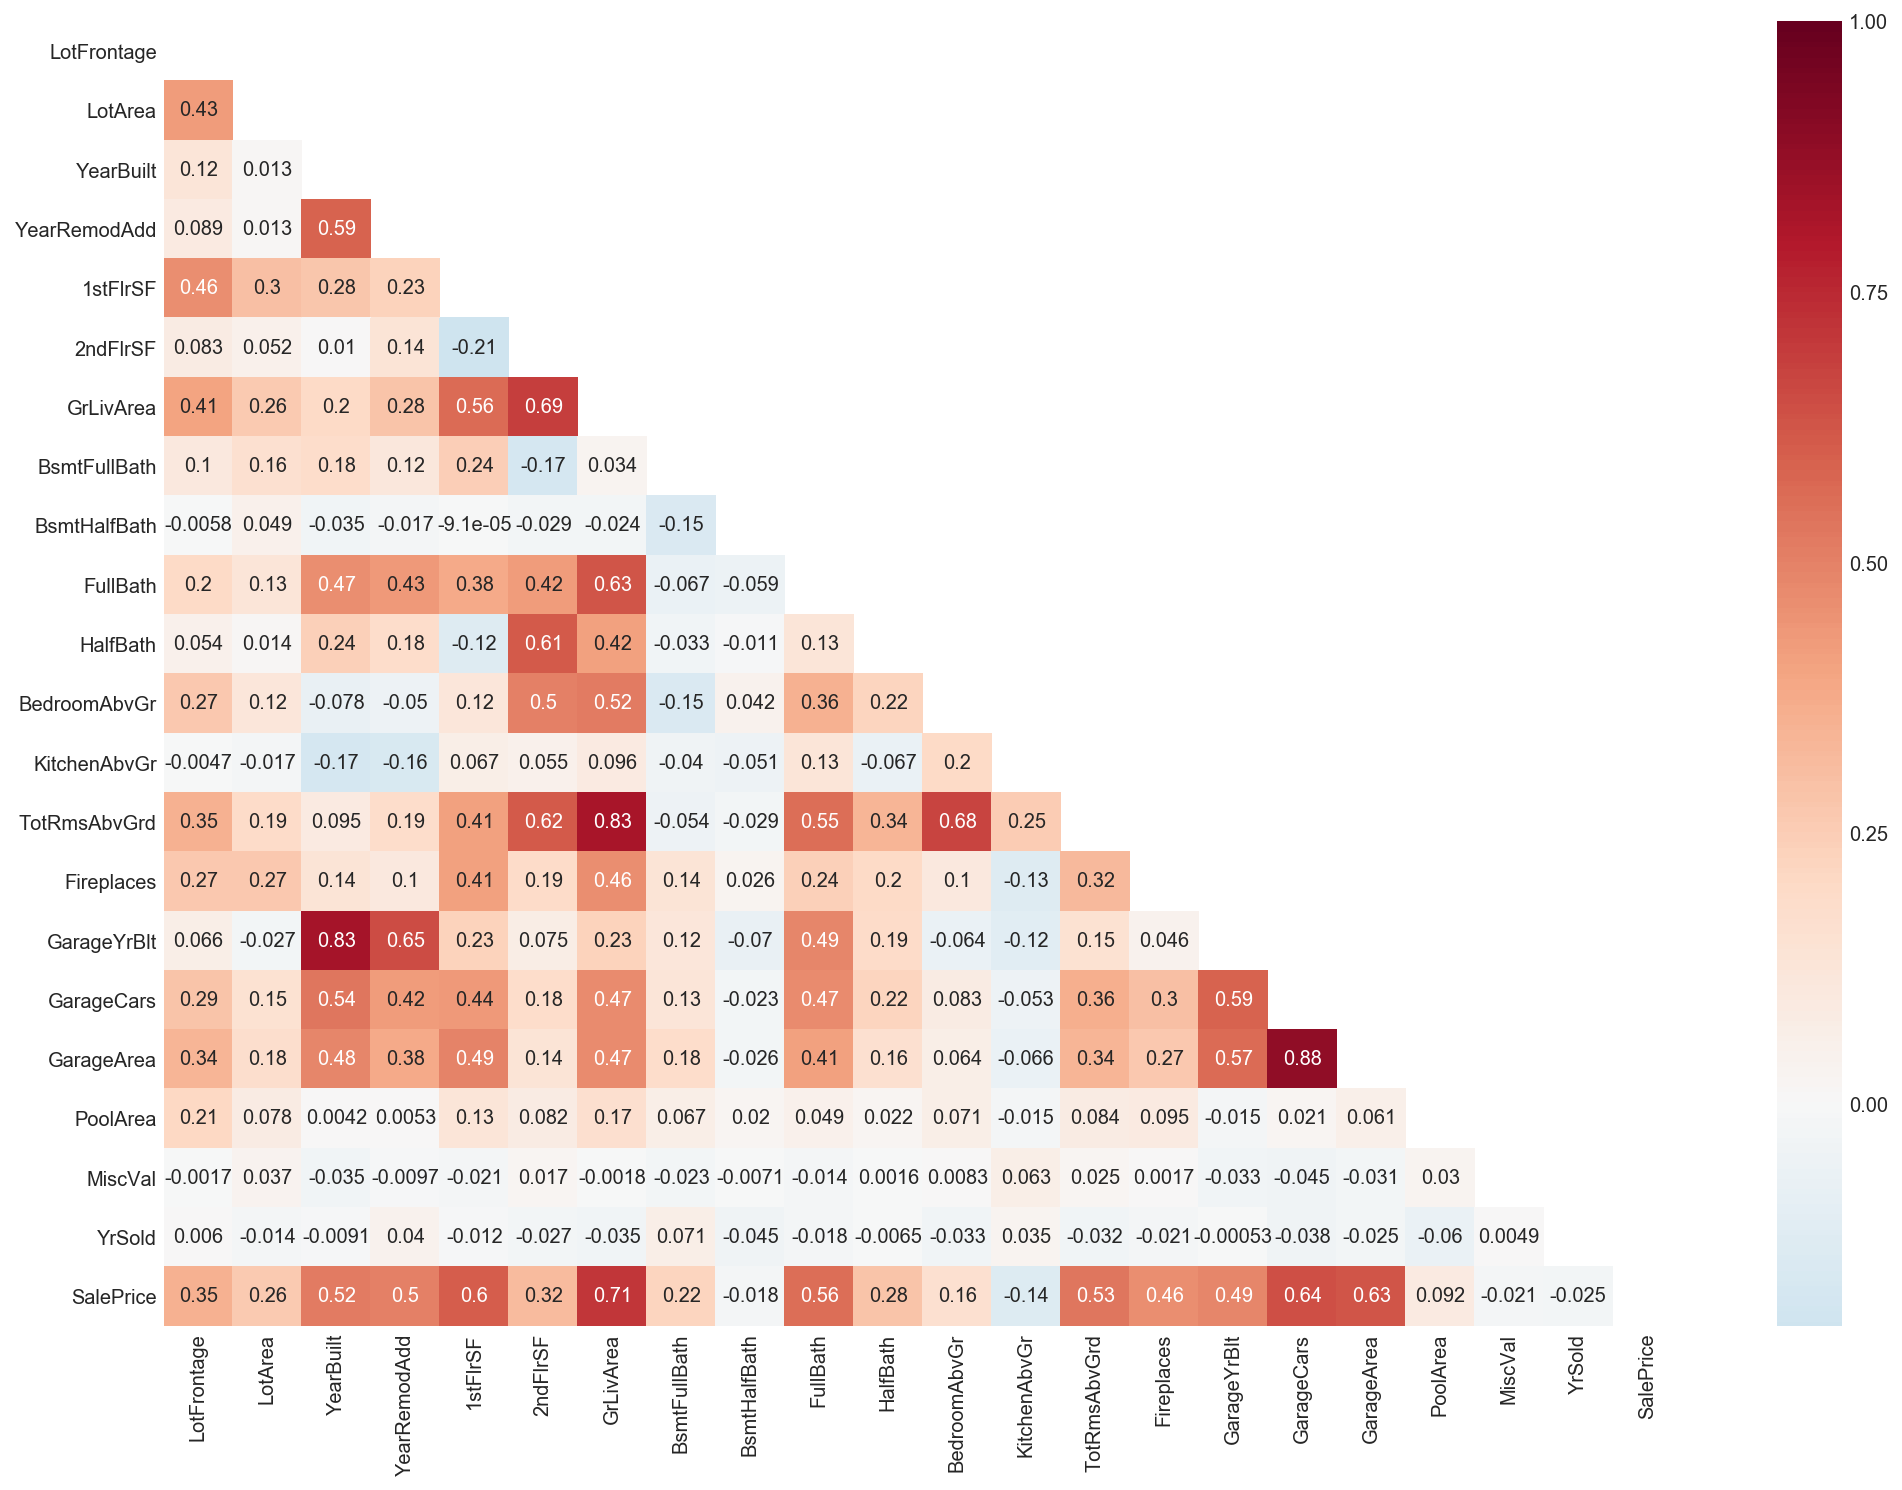

In [13]:
#any relationship between numerical values?
fig = plt.subplots(figsize=(17,12))
mask = np.zeros_like(num_features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(num_features.corr(), mask=mask, annot=True, cmap='RdBu_r', center=0)

In [14]:
#Looks like mostly low correlation except for the following pairs:
#GarageArea and GarageCars. These are highly correlated as they mostly represent the same info. We can probably drop one of them.
#GarageYrBlt and YearBuilt. These are highly correlated as they mostly represent the same info. We can probably drop one of them.
#TotRmsAbvGrd and GrLivArea. These are highly correlated as they mostly represent the same info. We can probably drop one of them.
num_features = num_features.drop(['GarageCars','GarageYrBlt','TotRmsAbvGrd'], axis=1)
num_features.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,2003,2003,856,854,1710,1,0,2,1,3,1,0,548,0,0,2008,208500
1,80.0,9600,1976,1976,1262,0,1262,0,1,2,0,3,1,1,460,0,0,2007,181500
2,68.0,11250,2001,2002,920,866,1786,1,0,2,1,3,1,1,608,0,0,2008,223500
3,60.0,9550,1915,1970,961,756,1717,1,0,1,0,3,1,1,642,0,0,2006,140000
4,84.0,14260,2000,2000,1145,1053,2198,1,0,2,1,4,1,1,836,0,0,2008,250000


In [15]:
#grouping categorical features into another dataframe
cat_feat = fixed.loc[:,fixed.dtypes == 'object']
#cat_feat['MSSubClass'].value_counts()
cat_feat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'BsmtQual', 'GarageType', 'MiscFeature'],
      dtype='object')

In [16]:
#Getting dummy variables for categorical features
cat_dummies = pd.get_dummies(cat_feat, drop_first=True)
cat_dummies.head()

,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,BsmtQual_Gd,BsmtQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [17]:
#combining the 2 dataframes back into 1 dataframe for further EDA.
combined = num_features.join(cat_dummies)
combined.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,BsmtQual_Gd,BsmtQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65.0,8450,2003,2003,856,854,1710,1,0,2,...,1,0,1,0,0,0,0,0,0,0
1,80.0,9600,1976,1976,1262,0,1262,0,1,2,...,1,0,1,0,0,0,0,0,0,0
2,68.0,11250,2001,2002,920,866,1786,1,0,2,...,1,0,1,0,0,0,0,0,0,0
3,60.0,9550,1915,1970,961,756,1717,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,1145,1053,2198,1,0,2,...,1,0,1,0,0,0,0,0,0,0


In [18]:
combined[combined.columns[combined.isnull().any() == True]].isnull().sum()
#Null values still present in 'LotFrontage', to be filled in based on train data below

LotFrontage    259
dtype: int64

In [19]:
#splitting into pre-2010 data and 2010 data, defining train-test matrix
train = combined.loc[combined['YrSold']<2010]
test = combined.loc[combined['YrSold']>=2010]
y_train = train['SalePrice']
X_train = train.drop(['SalePrice'],axis=1)
y_test = test['SalePrice']
X_test = test.drop(['SalePrice'],axis=1)

In [20]:
#Filling null values for 'LotFrontage' based on train data only
print(X_train['LotFrontage'].mean())
print(X_train['LotFrontage'].median())

69.82397716460514
69.0


In [21]:
#Mean is close to median. Median value will used to fill null values for both test and train datasets.
X_train['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace=True)
X_test['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace=True)

In [22]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,BsmtQual_Gd,BsmtQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65.0,8450,2003,2003,856,854,1710,1,0,2,...,1,0,1,0,0,0,0,0,0,0
1,80.0,9600,1976,1976,1262,0,1262,0,1,2,...,1,0,1,0,0,0,0,0,0,0
2,68.0,11250,2001,2002,920,866,1786,1,0,2,...,1,0,1,0,0,0,0,0,0,0
3,60.0,9550,1915,1970,961,756,1717,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,1145,1053,2198,1,0,2,...,1,0,1,0,0,0,0,0,0,0


## Applying a Linear Model

In [23]:
#Using statsmodel
import statsmodels.api as sm
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test, has_constant='add') 
#Apparently test set already has a feature with identical values, so needed has_constant='add' for it to work. Otherwise X_train_c and X_test_c will have different no. of features and I will get an error when predicting y.

In [24]:
#Fitting a model
olsmodel = sm.OLS(y_train,X_train_c).fit()

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


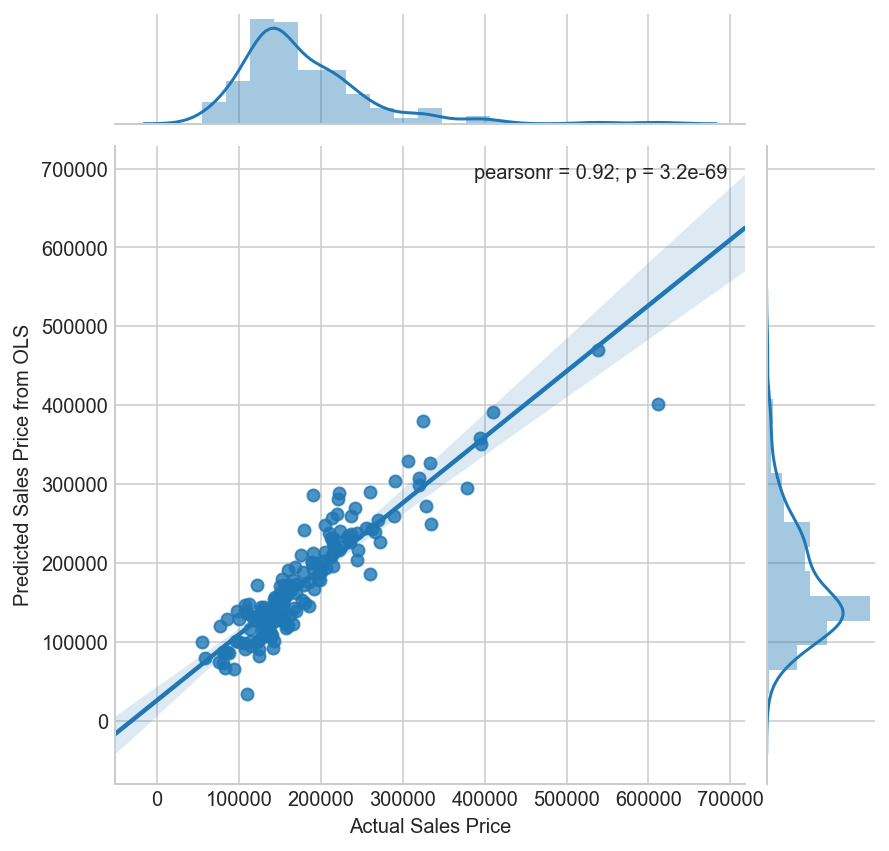

In [25]:
#visualizing the performance of predicted y vs actual y in the test data.
y_pred_ols = olsmodel.predict(X_test_c)
sns.jointplot(y_test,y_pred_ols, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from OLS')

In [26]:
olsmodel.summary()
#R-squared value is 0.842. Pretty good!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     71.18
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        02:23:03   Log-Likelihood:                -15047.
No. Observations:                1278   AIC:                         3.027e+04
Df Residuals:                    1188   BIC:                         3.074e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.041e+06    1.7e+06      0.613      0.540   -2.29e+06    4.37e+06
LotFrontage           -104.0424     59.903     -1.737      0.083    -221.570      13.485
LotArea                  0.6506      0.137      4.737      0.000       0.381       0.920
YearBuilt              353.2345     83.983      4.206      0.000     188.464     518.005
YearRemodAdd           377.6379     63.596      5.938      0.000     252.866     502.410
1stFlrSF                39.4726     21.490      1.837      0.066      -2.690      81.635
2ndFlrSF                21.0986     21.468      0.983      0.326     -21.021      63.219
GrLivArea               36.2330     21.010      1.725      0.085      -4.987      77.453
BsmtFullBath           1.53e+04   2084.095      7.343      0.000    1.12e+04    1.94e+04
BsmtHalfBath          1.087e+04   3944.642      2.756      0.006    3130.643    1.86e+04
FullBath              7243.1173   3133.840      2.311      0.021    1094.640    1.34e+04
HalfBath              3780.1724   2939.875      1.286      0.199   -1987.753    9548.097
BedroomAbvGr         -5610.7791   1699.703     -3.301      0.001   -8945.533   -2276.025
KitchenAbvGr           -3.1e+04   7205.086     -4.302      0.000   -4.51e+04   -1.69e+04
Fireplaces            7740.7122   1879.190      4.119      0.000    4053.810    1.14e+04
GarageArea              24.2600      6.978      3.477      0.001      10.570      37.950
PoolArea                 8.7353     24.001      0.364      0.716     -38.353      55.824
MiscVal                  1.4307      2.108      0.679      0.497      -2.705       5.567
YrSold               -1195.5619    840.937     -1.422      0.155   -2845.449     454.326
MSZoning_RH           8166.0268   1.29e+04      0.635      0.526   -1.71e+04    3.34e+04
MSZoning_RL           4321.5197   9366.065      0.461      0.645   -1.41e+04    2.27e+04
MSZoning_RM           9540.0039   1.05e+04      0.908      0.364   -1.11e+04    3.02e+04
Street_Pave           4.503e+04   2.14e+04      2.107      0.035    3101.248     8.7e+04
Alley_Pave            1092.8361   6758.618      0.162      0.872   -1.22e+04    1.44e+04
LotShape_IR2          9837.5475   6140.503      1.602      0.109   -2209.892    2.19e+04
LotShape_IR3         -4.024e+04   1.17e+04     -3.443      0.001   -6.32e+04   -1.73e+04
LotShape_Reg         -1214.3395   2323.631     -0.523      0.601   -5773.217    3344.538
LandContour_HLS       2.622e+04   7114.344      3.686      0.000    1.23e+04    4.02e+04
LandContour_Low       1.009e+04   9138.040      1.105      0.270   -7833.689     2.8e+04
LandContour_Lvl       1.231e+04   5052.968      2.435      0.015    2392.244    2.22e+04
LotConfig_CulDSac     5453.2977   4767.910      1.144      0.253   -3901.164    1.48e+04
LotConfig_FR2        -8073.7589   5901.475     -1.368    

In [27]:
#Using sklearn Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
sklmodel = lm.fit(X_train,y_train)

In [28]:
#Cross-validation of the model within the train set 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(sklmodel, X_train, y_train, cv=10)
print("Cross-validated scores:", scores, "Average Score:", np.mean(scores))
#Average score of 0.78 is not bad. Lets test it on the test set.

Cross-validated scores: [0.88399178 0.82158634 0.83571914 0.72754484 0.82809711 0.69470095
 0.86354773 0.7697606  0.58064561 0.80554506] Average Score: 0.7811139148846774


C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


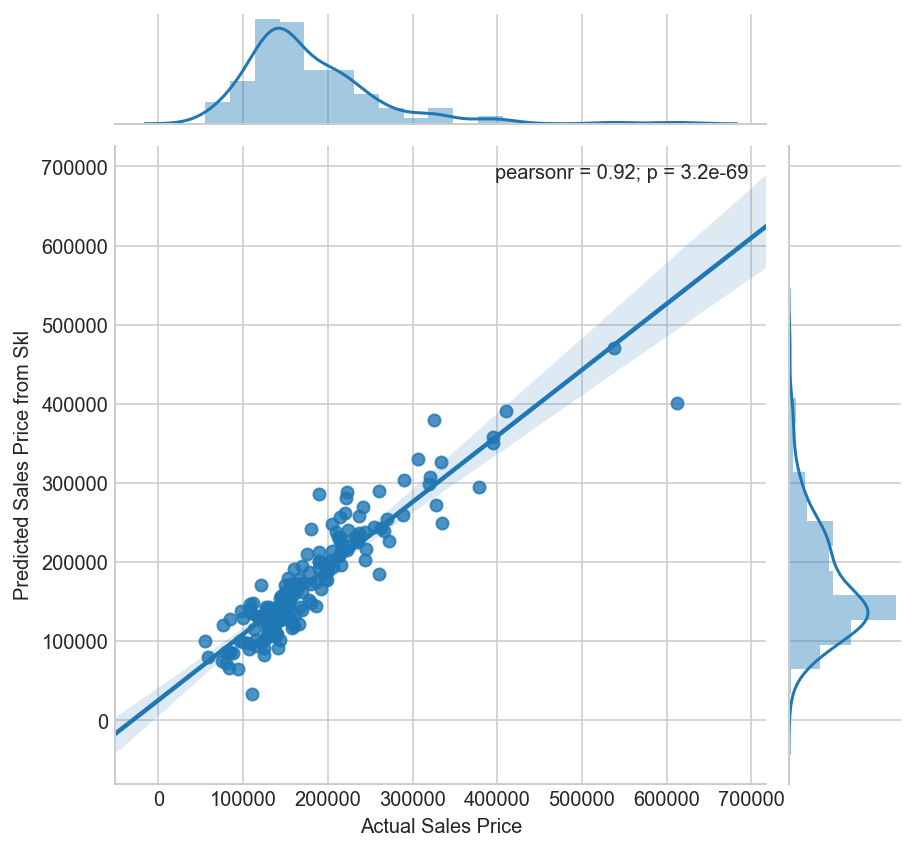

In [29]:
#Predicting Sales Price for test set
y_pred_skl = sklmodel.predict(X_test)
sns.jointplot(y_test,y_pred_skl, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from Skl')

In [30]:
#Coefficients of the features from Sklearn model
pd.DataFrame([X_train.columns, list(sklmodel.coef_)],index=['feature','coef']).T.head(15)
#Also similar to statsmodel OLS coefficients

,feature,coef
0,LotFrontage,-104.042
1,LotArea,0.650603
2,YearBuilt,353.235
3,YearRemodAdd,377.638
4,1stFlrSF,39.4726
5,2ndFlrSF,21.0986
6,GrLivArea,36.233
7,BsmtFullBath,15304
8,BsmtHalfBath,10869.9
9,FullBath,7243.12


In [31]:
#Intercept
sklmodel.intercept_
#Also similar to statsmodel OLS intercept

1041166.5350906125

In [32]:
#Sklearn model R2 score
sklscore = sklmodel.score(X_test, y_test)
sklscore
#Similar to statsmodel score! Pretty good score too.

0.8361141270144078

In [33]:
sklmodel.score(X_train, y_train)
#Applying the model on the train set gives a similar R2 score as the test set.

0.8420802208285256

#### Comments  
_Using a Linear Model gives a pretty good prediction of Sales Price. Since the R2 score for the train set and test set are similar, this model is good at predicting unseen (test) data. Regularization is actually not necessary._

## Applying Lasso Regression

In [34]:
#Scaling the variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test) #Not fitting to the test set
Xs_test.shape

(172, 89)

In [35]:
#Using LassoCV in order to optimize alpha, training on train set.
from sklearn.linear_model import LassoCV
lasso = LassoCV(eps=0.001, n_alphas=500, cv=10, normalize=True)
lasmodel = lasso.fit(Xs_train, y_train)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


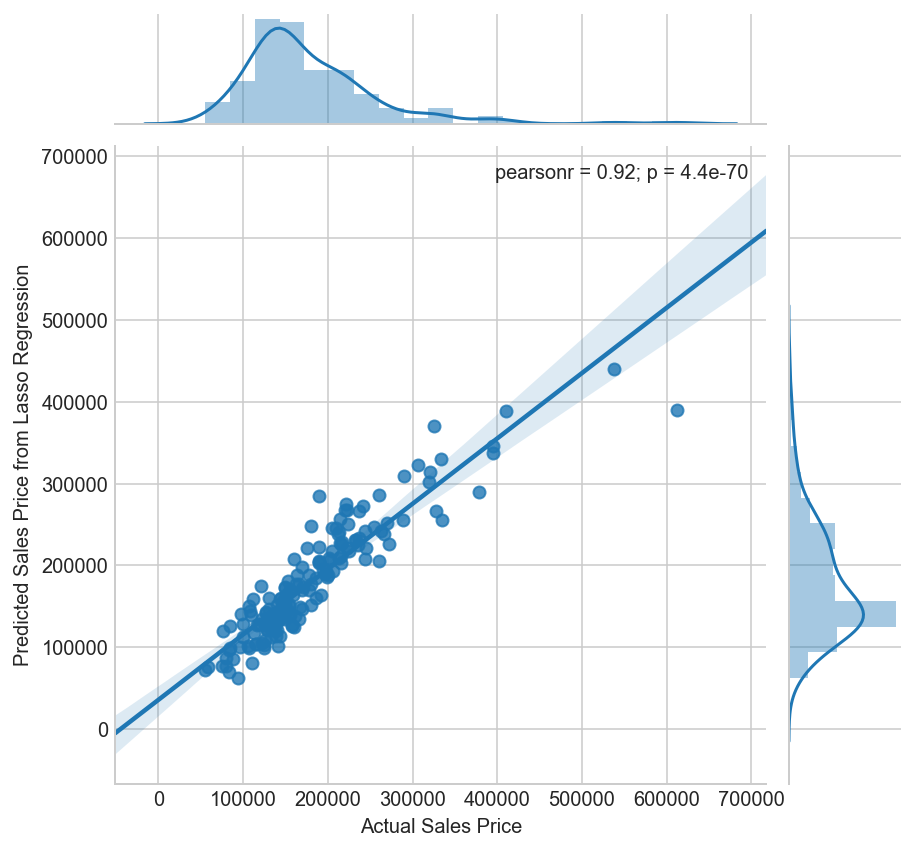

In [36]:
#predicting y values based on test set
y_pred_lasso = lasmodel.predict(Xs_test)
sns.jointplot(y_test,y_pred_lasso, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from Lasso Regression')

In [37]:
#Examining the coefficients
pd.DataFrame([X_train.columns, list(lasmodel.coef_)],index=['feature','coef']).T.head(15)
#Extremely different from Linear Model

,feature,coef
0,LotFrontage,-0
1,LotArea,4100.17
2,YearBuilt,12922.6
3,YearRemodAdd,8271.51
4,1stFlrSF,6937.96
5,2ndFlrSF,0
6,GrLivArea,30419.2
7,BsmtFullBath,6446.99
8,BsmtHalfBath,1547.76
9,FullBath,2945.79


In [38]:
print("Best alpha:", lasmodel.alpha_)
print("Intercept:", lasmodel.intercept_)
lasscore = lasmodel.score(Xs_test, y_test)
print("R2 Score:", lasscore)

Best alpha: 21.436280377181447
Intercept: 181989.78247261344
R2 Score: 0.839958994879189


In [39]:
#Checking the test set R2 score against training set
print("Training set R2 Score:", lasmodel.score(Xs_train, y_train))
#Similar R2 score as test set. Model is a good predictor for unseen data.

Training set R2 Score: 0.8329890755829563


## Applying Ridge Regression

In [40]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.linspace(0.1,100,200), cv=10, normalize=True)
rmodel = ridge.fit(Xs_train, y_train)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


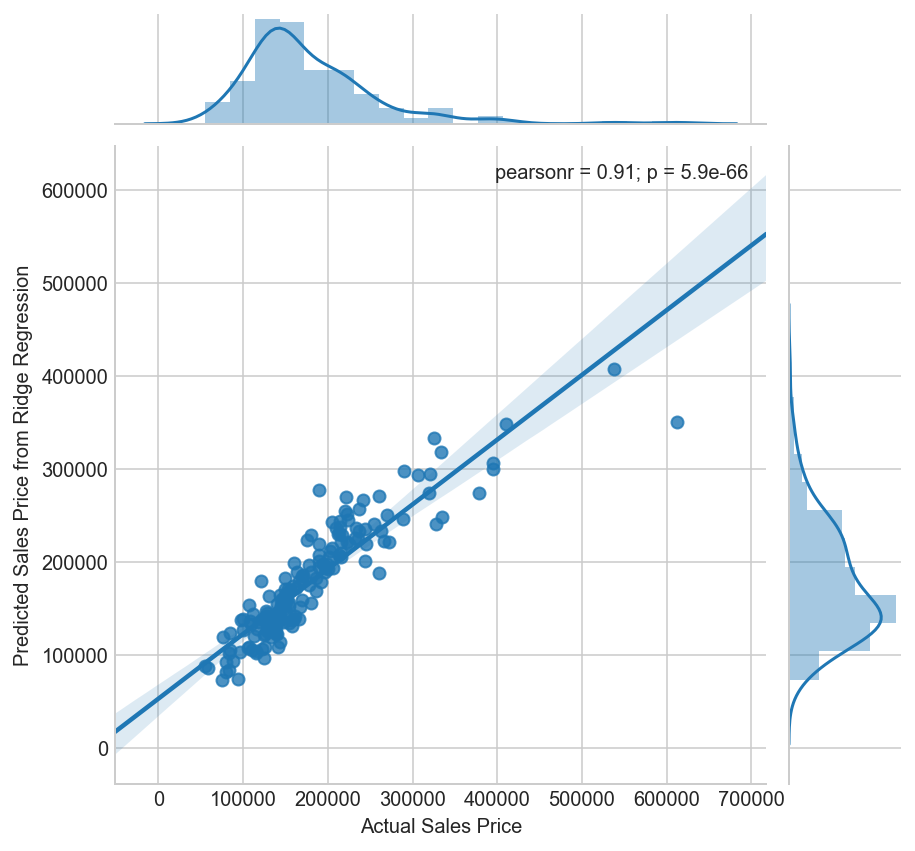

In [41]:
#predicting y values based on test set
y_pred_ridge = rmodel.predict(Xs_test)
sns.jointplot(y_test,y_pred_ridge, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from Ridge Regression')

In [42]:
#Examining the coefficients
pd.DataFrame([X_train.columns, list(rmodel.coef_)],index=['feature','coef']).T.head(15)
#Extremely different from both Linear Model and Lasso Regression

,feature,coef
0,LotFrontage,2252.31
1,LotArea,3614.39
2,YearBuilt,5987.9
3,YearRemodAdd,7169.05
4,1stFlrSF,10946
5,2ndFlrSF,5113.85
6,GrLivArea,12322.7
7,BsmtFullBath,5216.67
8,BsmtHalfBath,971.335
9,FullBath,6202.37


In [43]:
print("Best alpha:", rmodel.alpha_)
print("Intercept:", rmodel.intercept_)
ridgescore = rmodel.score(Xs_test, y_test)
print("R2 Score:", ridgescore)

Best alpha: 0.6020100502512563
Intercept: 181989.78247261344
R2 Score: 0.8035824851207196


In [44]:
#Checking the test set R2 score against training set
print("Training set R2 Score:", rmodel.score(Xs_train, y_train))
#Similar R2 score as test set. Model is a good predictor for unseen data.

Training set R2 Score: 0.8044772552841157


## Applying Elastic Net Regression

In [45]:
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=500, cv=10, normalize=True)
enmodel = enet.fit(Xs_train, y_train)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


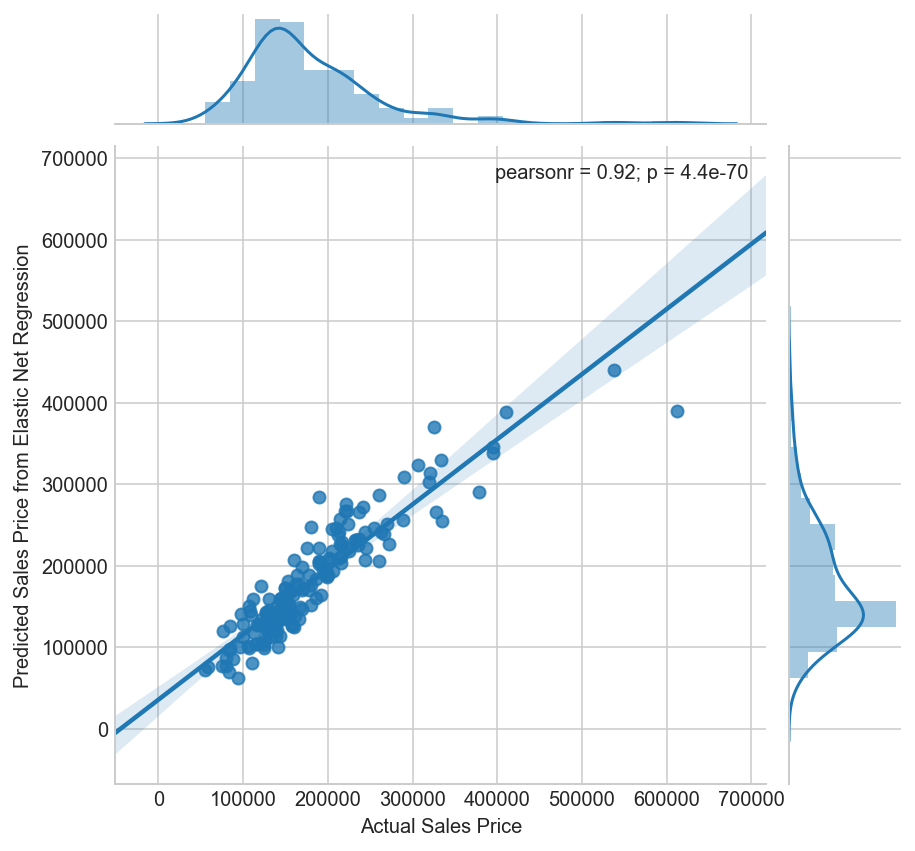

In [46]:
#predicting y values based on test set
y_pred_enet = enmodel.predict(Xs_test)
sns.jointplot(y_test,y_pred_enet, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from Elastic Net Regression')

In [47]:
#Examining the coefficients
pd.DataFrame([X_train.columns, list(enmodel.coef_)],index=['feature','coef']).T.head(15)
#Identical to Lasso Regression above.

,feature,coef
0,LotFrontage,-0
1,LotArea,4100.17
2,YearBuilt,12922.6
3,YearRemodAdd,8271.51
4,1stFlrSF,6937.96
5,2ndFlrSF,0
6,GrLivArea,30419.2
7,BsmtFullBath,6446.99
8,BsmtHalfBath,1547.76
9,FullBath,2945.79


In [48]:
print("Best alpha:", enmodel.alpha_)
print("l1 Ratio chosen:", enmodel.l1_ratio_)
print("Intercept:", enmodel.intercept_)
enscore = enmodel.score(Xs_test, y_test)
print("R2 Score:", enscore)
#l1_ratio chosen is 1, meaning this is the same result as a full Lasso regression. This explains the identical coefficients

Best alpha: 21.436280377181447
l1 Ratio chosen: 1.0
Intercept: 181989.78247261344
R2 Score: 0.839958994879189


In [49]:
#Checking the test set R2 score against training set
print("Training set R2 Score:", enmodel.score(Xs_train, y_train))
#Similar R2 score as test set. Model is a good predictor for unseen data.

Training set R2 Score: 0.8329890755829563


## Feature Selection  
To see which features are most significant in predicting our target, SalesPrice

In [50]:
#using f_regression and mutual_info_regression (Chi2 and f_classif is for classification, which is not applicable in this case)
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

skb_f = SelectKBest(f_regression, k=10)
skb_m = SelectKBest(mutual_info_regression, k=10)
skb_f.fit(Xs_train, y_train)
skb_m.fit(Xs_train, y_train)

kbest = pd.DataFrame([X_train.columns, list(skb_f.scores_), list(skb_m.scores_)], 
                     index=['feature','f_reg','m_i_r']).T.sort_values('f_reg', ascending=False)
kbest.head(15)
#Best scoring features listed below. 

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,feature,f_reg,m_i_r
6,GrLivArea,1284,0.474729
14,GarageArea,844.791,0.355744
4,1stFlrSF,711.931,0.305291
9,FullBath,590.937,0.26327
2,YearBuilt,453.593,0.362307
3,YearRemodAdd,438.748,0.221479
13,Fireplaces,358.346,0.174333
80,BsmtQual_TA,326.739,0.178454
50,Neighborhood_NridgHt,255.633,0.0718304
85,GarageType_Detchd,184.346,0.108338


In [51]:
#Feature selection by recursive features elimination
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
selector = RFECV(lm, step=1, cv=10)
selector = selector.fit(Xs_train, y_train)
rfecv_columns = X_train.columns[selector.support_]
rfecv_columns
#RFECV method did not remove many features. Not very useful.

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_RRAe',
       'Condition2_PosA', 'Condition2_PosN', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtQ

In [52]:
#Feature selection based on elimination of coefficients from Lasso Regression, using the results of the above Lasso Regression
coef = pd.DataFrame([X_train.columns, list(lasmodel.coef_)],index=['feature','coef']).T.set_index('feature')
coef_abs = coef.abs().sort_values('coef', ascending=False)
coef_abs.head(15)

,coef
feature,
GrLivArea,30419.2
Neighborhood_NridgHt,13764.5
YearBuilt,12922.6
BsmtQual_Gd,10862.3
Neighborhood_NoRidge,10007
BsmtQual_TA,8935.88
YearRemodAdd,8271.51
Neighborhood_StoneBr,8094.68
1stFlrSF,6937.96


## Conclusion  

In [53]:
pd.DataFrame([olsmodel.rsquared, sklscore, lasscore, ridgescore, enscore], columns=['R2 score'], index = ['sm_lr','skl_lr','lasso','ridge','elasticnet'])

,R2 score
sm_lr,0.842080
skl_lr,0.836114
lasso,0.839959
ridge,0.803582
elasticnet,0.839959


_Based on the R squared score, all of the models performed similarly well with the exception of ridge regression, which has the worst score. This is also shown by the elastic net regression, which chose a l1 ratio of 1.0, meaning a full lasso regression is the best fit._  
  
  
_As mentioned earlier, regularization wasn't entirely necessary as the R2 score of both the training and test set are pretty close, meaning the models aren't too overfit or underfit to the training set, and can predict the test set pretty well. Linear regression is sufficient to predict Sales Prices based on the chosen fixed features._  
  
_Based on the various feature selection techniques, the top predictor of prices is GrLivArea. Other good predictors include GarageArea, YearBuilt, 1stFlrSF, FullBath, YearRemodAdd, and Fireplaces._

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [54]:
# A: Selecting for renovate-able features
renovateable = residential[['Utilities','HouseStyle', 'OverallQual', 'OverallCond','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']]
renovateable.head(10)

,Utilities,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,AllPub,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,SBrkr,0,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,AllPub,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,...,SBrkr,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN
2,AllPub,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
3,AllPub,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,...,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN
4,AllPub,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
5,AllPub,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,...,SBrkr,0,TA,Typ,NaN,Unf,TA,TA,NaN,MnPrv
6,AllPub,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,...,SBrkr,0,Gd,Typ,Gd,RFn,TA,TA,NaN,NaN
7,AllPub,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,TA,...,SBrkr,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN
8,AllPub,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,TA,...,FuseF,0,TA,Min1,TA,Unf,Fa,TA,NaN,NaN
9,AllPub,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,TA,...,SBrkr,0,TA,Typ,TA,RFn,Gd,TA,NaN,NaN


In [55]:
#Getting full list of predicted Sales Prices from the previous statsmodel ols model in order to calculate residuals for all 1450 rows.
y_pred_ols_train = olsmodel.predict(X_train_c)
y_pred = y_pred_ols.add(y_pred_ols_train, fill_value=0)
y_pred

0       213274.912175
1       181482.832824
2       229644.151309
3       194803.671328
4       308144.862387
5       165510.462270
6       295339.047236
7       223166.799364
8       133118.220707
9       124484.828630
10      128037.592043
11      374947.113061
12      133295.320258
13      212062.032862
14      159771.704286
15      121682.529250
16      150198.289595
17      105775.026375
18      158716.251623
19      130284.686367
20      359523.867369
21       99168.210887
22      222787.449527
23      122495.207502
24      146510.065648
25      277410.753184
26      123429.967035
27      329746.283529
28      215761.651443
29       57880.413597
            ...      
1430    167896.924595
1431    121646.867412
1432    107533.943530
1433    210217.454212
1434    161662.535714
1435    193395.019095
1436    101467.407209
1437    346810.343127
1438    162087.260647
1439    186988.255044
1440    265370.386567
1441    137055.604614
1442    304450.651826
1443     97334.618659
1444    18

In [56]:
#Adding "residuals" column the the dataframe
renovateable['residuals'] = residential['SalePrice'] - y_pred
renovateable.head(10)

C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Utilities,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,residuals
0,AllPub,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,0,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN,-4774.912175
1,AllPub,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,...,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN,17.167176
2,AllPub,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN,-6144.151309
3,AllPub,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,...,0,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN,-54803.671328
4,AllPub,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,...,0,Gd,Typ,TA,RFn,TA,TA,NaN,NaN,-58144.862387
5,AllPub,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,...,0,TA,Typ,NaN,Unf,TA,TA,NaN,MnPrv,-22510.462270
6,AllPub,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,...,0,Gd,Typ,Gd,RFn,TA,TA,NaN,NaN,11660.952764
7,AllPub,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,TA,...,0,TA,Typ,TA,RFn,TA,TA,NaN,NaN,-23166.799364
8,AllPub,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,TA,...,0,TA,Min1,TA,Unf,Fa,TA,NaN,NaN,-3218.220707
9,AllPub,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,TA,...,0,TA,Typ,TA,RFn,Gd,TA,NaN,NaN,-6484.828630


In [57]:
renovateable.info()
#Most features are categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 30 columns):
Utilities       1450 non-null object
HouseStyle      1450 non-null object
OverallQual     1450 non-null int64
OverallCond     1450 non-null int64
RoofStyle       1450 non-null object
RoofMatl        1450 non-null object
Exterior1st     1450 non-null object
Exterior2nd     1450 non-null object
MasVnrType      1442 non-null object
ExterQual       1450 non-null object
ExterCond       1450 non-null object
Foundation      1450 non-null object
BsmtCond        1413 non-null object
BsmtExposure    1412 non-null object
BsmtFinType1    1413 non-null object
BsmtFinType2    1412 non-null object
Heating         1450 non-null object
HeatingQC       1450 non-null object
CentralAir      1450 non-null object
Electrical      1449 non-null object
LowQualFinSF    1450 non-null int64
KitchenQual     1450 non-null object
Functional      1450 non-null object
FireplaceQu     769 non-null object
GarageFin

In [58]:
#Since residuals are variance unexplained by our earlier model, the residuals will be our new target variable. 
#We will construct a model using the renovateable features as predictors.

In [59]:
#converting categorical values into dummies
reno = pd.get_dummies(renovateable, drop_first=True)
reno.columns[reno.isnull().any()==True] #No null values present

Index([], dtype='object')

In [60]:
#Specifying predictors and target matrix. 
#For clarity, all the X and y variable names in this question will have '2' in the name.
#Train and test split will be the same as question 1; pre-2010 and 2010. train.index and text.index will be used.
X_train2 = reno.loc[train.index].drop(['residuals'],axis=1)
X_test2 = reno.loc[test.index].drop(['residuals'],axis=1)
y_train2 = reno.loc[train.index]['residuals']
y_test2 = reno.loc[test.index]['residuals']

## Applying a Linear Model - Qn 2

In [61]:
#Using statsmodel
X_train2_c = sm.add_constant(X_train2, has_constant='add')
X_test2_c = sm.add_constant(X_test2, has_constant='add') 

In [62]:
#Fitting a model
olsmodel2 = sm.OLS(y_train2,X_train2_c).fit()

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


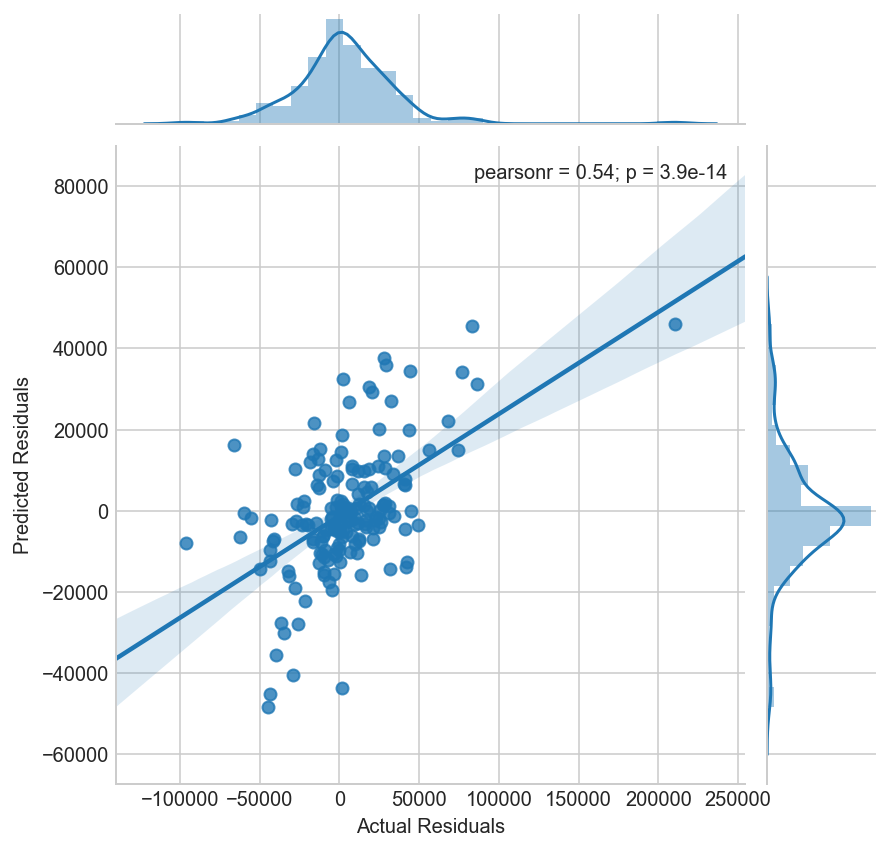

In [63]:
#visualizing the performance of predicted y vs actual y in the test data.
y_pred_ols2 = olsmodel2.predict(X_test2_c)
sns.jointplot(y_test2,y_pred_ols2, kind='reg').set_axis_labels('Actual Residuals', 'Predicted Residuals')

In [64]:
olsmodel2.summary()
#R-squared value is 0.381

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.835
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           4.30e-61
Time:                        02:23:32   Log-Likelihood:                -14741.
No. Observations:                1278   AIC:                         2.973e+04
Df Residuals:                    1155   BIC:                         3.036e+04
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.434e+05   5.37e+04    -10.125      0.000   -6.49e+05   -4.38e+05
OverallQual          4126.5879   1043.566      3.954      0.000    2079.091    6174.085
OverallCond          4286.2582    865.032      4.955      0.000    2589.048    5983.468
LowQualFinSF          -17.8489     20.937     -0.853      0.394     -58.928      23.230
Utilities_NoSeWa    -2.534e+04   2.72e+04     -0.933      0.351   -7.86e+04     2.8e+04
HouseStyle_1.5Unf    5956.7057   8140.936      0.732      0.465      -1e+04    2.19e+04
HouseStyle_1Story    -827.5811   3061.222     -0.270      0.787   -6833.759    5178.597
HouseStyle_2.5Fin   -1.921e+04   1.28e+04     -1.501      0.134   -4.43e+04    5900.573
HouseStyle_2.5Unf    2483.1047   9621.419      0.258      0.796   -1.64e+04    2.14e+04
HouseStyle_2Story   -2494.9405   3190.041     -0.782      0.434   -8753.864    3763.983
HouseStyle_SFoyer    1967.2188   6001.172      0.328      0.743   -9807.201    1.37e+04
HouseStyle_SLvl     -5010.9686   4900.408     -1.023      0.307   -1.46e+04    4603.730
RoofStyle_Gable     -7938.0359   1.99e+04     -0.399      0.690    -4.7e+04    3.11e+04
RoofStyle_Gambrel    2930.7811    2.2e+04      0.133      0.894   -4.03e+04    4.62e+04
RoofStyle_Hip       -7293.6180      2e+04     -0.365      0.715   -4.65e+04    3.19e+04
RoofStyle_Mansard      1.1e+04   2.44e+04      0.451      0.652   -3.69e+04    5.89e+04
RoofStyle_Shed       1628.2798   3.36e+04      0.048      0.961   -6.43e+04    6.75e+04
RoofMatl_CompShg     4.823e+05   3.44e+04     14.015      0.000    4.15e+05     5.5e+05
RoofMatl_Membran     5.281e+05   5.03e+04     10.503      0.000    4.29e+05    6.27e+05
RoofMatl_Metal        5.03e+05   4.91e+04     10.249      0.000    4.07e+05    5.99e+05
RoofMatl_Roll        5.147e+05   4.43e+04     11.616      0.000    4.28e+05    6.02e+05
RoofMatl_Tar&Grv     4.675e+05   3.95e+04     11.850      0.000     3.9e+05    5.45e+05
RoofMatl_WdShake      4.77e+05   3.93e+04     12.152      0.000       4e+05    5.54e+05
RoofMatl_WdShngl     5.336e+05   3.64e+04     14.669      0.000    4.62e+05    6.05e+05
Exterior1st_AsphShn  3.439e-09   3.25e-10     10.596      0.000     2.8e-09    4.08e-09
Exterior1st_BrkComm  1.493e+04   2.88e+04      0.519      0.604   -4.15e+04    7.14e+04
Exterior1st_BrkFace  2.984e+04   1.45e+04      2.063      0.039    1455.838    5.82e+04
Exterior1st_CBlock  -6148.4654    1.5e+04     -0.410      0.682   -3.56e+04    2.33e+04
Exterior1st_CemntBd  1.313e+04   3.02e+04      0.434      0.664   -4.62e+04    7.25e+04
Exterior1st_HdBoard  1.715e+04   1.46e+04      1.178      0.239   -1.14e+04    4.57e+04
Exterior1st_ImStucc -4.342e+04   3.15e+04     -1.378      0.168   -1.05e+05    1.84e+04
Exterior1st_MetalSd  1.904e+04   1.68e+04      1.132      0.258    -1.4e+04    5.21e+04
Ext

## Trying Elastic Net Regression - Qn 2

In [65]:
#Scaling X
Xs_train2 = ss.fit_transform(X_train2)
Xs_test2 = ss.transform(X_test2) #Not fitting to the test set
Xs_test2.shape

(172, 125)

In [66]:
enet2 = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=500, cv=10, normalize=True)
enmodel2 = enet2.fit(Xs_train2, y_train2)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


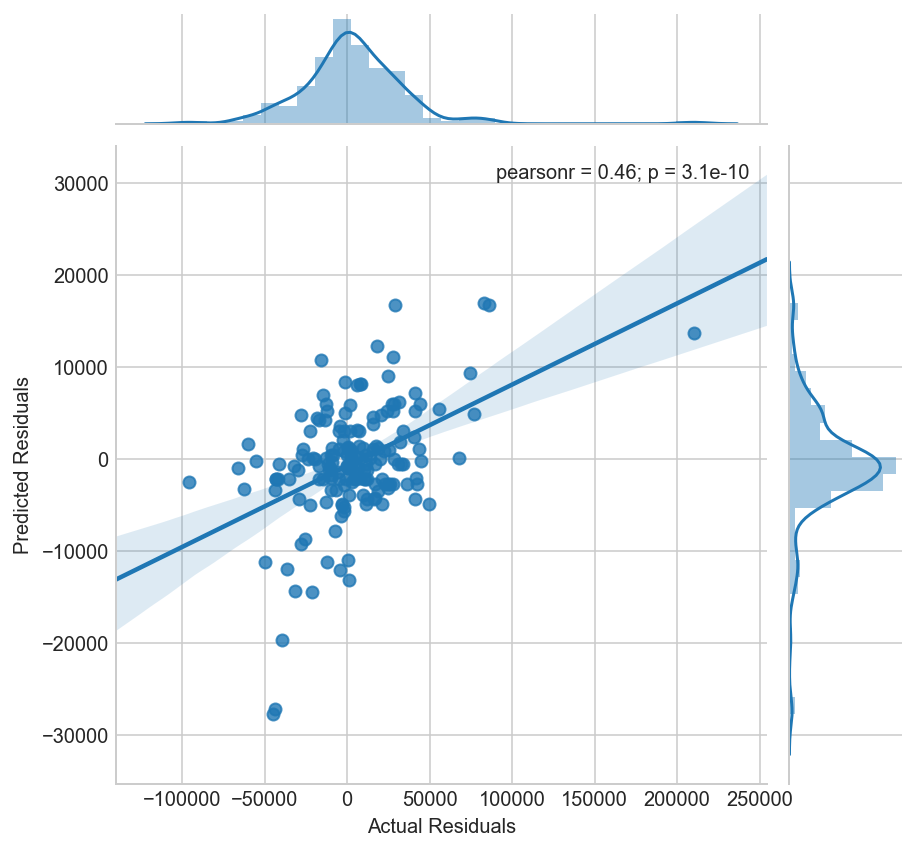

In [67]:
#predicting y values based on test set
y_pred_enet2 = enmodel2.predict(Xs_test2)
sns.jointplot(y_test2,y_pred_enet2, kind='reg').set_axis_labels('Actual Residuals', 'Predicted Residuals')

In [68]:
#Examining the coefficients
pd.DataFrame([X_train2.columns, list(enmodel2.coef_)],index=['feature','coef']).T.sort_values('coef', ascending=False)

,feature,coef
22,RoofMatl_WdShngl,3419.48
1,OverallCond,3188.58
0,OverallQual,3020.81
105,Functional_Typ,2844.45
70,BsmtExposure_Gd,2263.19
25,Exterior1st_BrkFace,1163.06
41,Exterior2nd_CmentBd,657.718
69,BsmtCond_TA,484.461
43,Exterior2nd_ImStucc,132.027
87,Heating_Wall,-0


In [69]:
print("Best alpha:", enmodel2.alpha_)
print("l1 Ratio chosen:", enmodel2.l1_ratio_)
print("Intercept:", enmodel2.intercept_)
print("R2 Score:", enmodel2.score(Xs_test2, y_test2))
#l1_ratio chosen is 1, meaning this is the same result as a full Lasso regression.
#Elastic net regression is doing worse than Linear regression without regularization.

Best alpha: 53.80708488598698
l1 Ratio chosen: 1.0
Intercept: 7.995003106101316e-10
R2 Score: 0.12047081857317243


In [70]:
#Checking the test set R2 score against training set
print("Training set R2 Score:", enmodel2.score(Xs_train2, y_train2))

Training set R2 Score: 0.15659525686730158


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [71]:
# A: